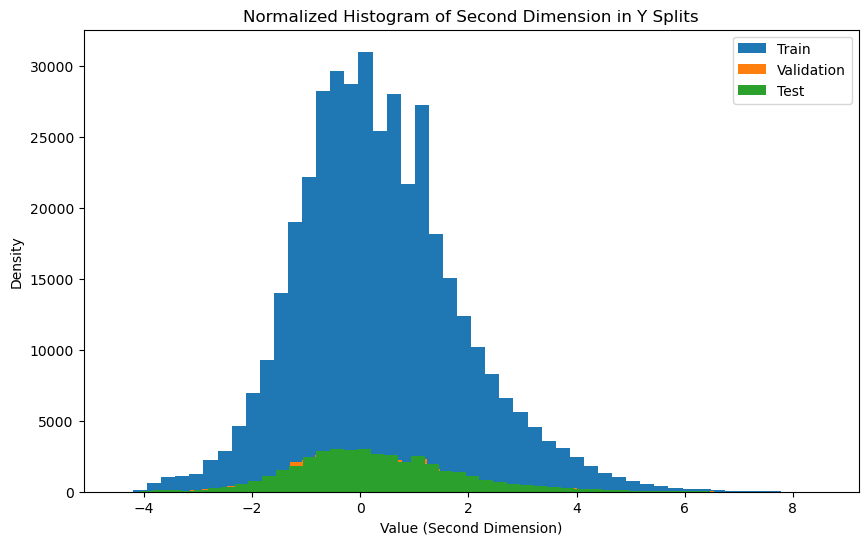

In [20]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

def plot_expression_distribution(h5_path, pairs=False):
    # Open the HDF5 file
    with h5py.File(h5_path, 'r') as f:
        Y_train = f['Y_train'][:]
        Y_val = f['Y_valid'][:]
        Y_test = f['Y_test'][:]

    # Extract the second dimension
    Y_train_second = Y_train[:, 1]  # really only plotting the housekeeping
    Y_val_second = Y_val[:, 1]
    Y_test_second = Y_test[:, 1]

    # this would be for developmental
    Y_train_second = Y_train[:, 0]  
    Y_val_second = Y_val[:, 0]
    Y_test_second = Y_test[:, 0]
    
    plt.figure(figsize=(10, 6))
    plt.hist(Y_train_second, bins=50, density=False, label='Train')
    plt.hist(Y_val_second, bins=50, density=False, label='Validation')
    plt.hist(Y_test_second, bins=50, density=False,  label='Test')
    plt.xlabel('Value (Second Dimension)')
    plt.ylabel('Density')
    plt.title('Normalized Histogram of Second Dimension in Y Splits')
    plt.legend()
    plt.show()

h5_path = "/grid/koo/home/duran/D3-DNA-Discrete-Diffusion/model_zoo/deepstarr/DeepSTARR_data.h5"
plot_expression_distribution(h5_path, pairs=False)

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 0]
 [1 0]
 [0 0]]
[[1 1]
 [1 1]
 [1 1]
 ...
 [1 0]
 [0 1]
 [1 1]]
[[1 1]
 [1 0]
 [1 1]
 ...
 [1 0]
 [1 0]
 [1 0]]


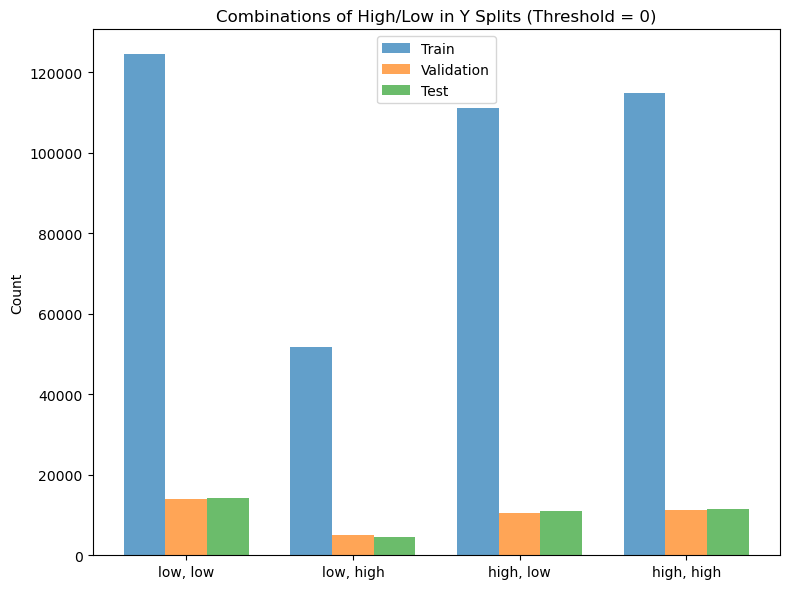

In [19]:
# visualize number of samples that have high-low values
h5_path = "/grid/koo/home/duran/D3-DNA-Discrete-Diffusion/model_zoo/deepstarr/DeepSTARR_data.h5"

# Open the HDF5 file
with h5py.File(h5_path, 'r') as f:
    Y_train = f['Y_train'][:]
    Y_val = f['Y_valid'][:]
    Y_test = f['Y_test'][:]

def count_combinations(Y):
    # Classify as high (>0) or low (<=0)
    high_low = (Y > 0).astype(int)  # 1 for high, 0 for low
    print(high_low)
    # Count combinations
    counts = np.zeros(4, dtype=int)
    for a, b in high_low:
        idx = a * 2 + b  # (0,0)->0, (0,1)->1, (1,0)->2, (1,1)->3
        counts[idx] += 1
    return counts

# Get counts for each split
counts_train = count_combinations(Y_train)
counts_val = count_combinations(Y_val)
counts_test = count_combinations(Y_test)

# Labels for the combinations
labels = ['low, low', 'low, high', 'high, low', 'high, high']

# Plotting
x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(8, 6))
plt.bar(x - width, counts_train, width, label='Train', alpha=0.7)
plt.bar(x, counts_val, width, label='Validation', alpha=0.7)
plt.bar(x + width, counts_test, width, label='Test', alpha=0.7)
plt.xticks(x, labels)
plt.ylabel('Count')
plt.title('Combinations of High/Low in Y Splits (Threshold = 0)')
plt.legend()
plt.tight_layout()
plt.show()

(775828, 18)
(83826, 18)
(68752, 18)


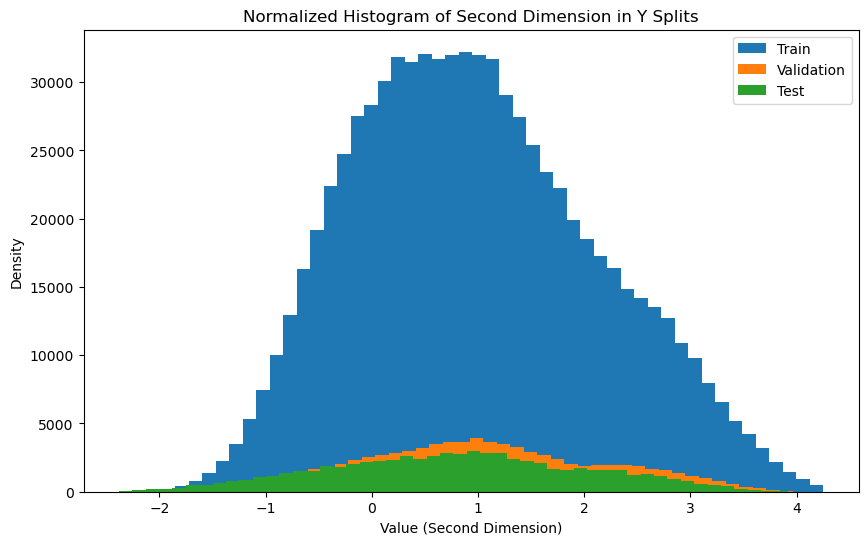

In [17]:
h5_path ="/grid/koo/home/duran/D3-DNA-Discrete-Diffusion/model_zoo/atac_seq/dataset.h5"

with h5py.File(h5_path, 'r') as f:
        Y_train = f['y_train'][:]
        Y_val = f['y_valid'][:]
        Y_test = f['y_test'][:]

print(Y_train.shape)
print(Y_val.shape)
print(Y_test.shape)

 # Extract the second dimension
Y_train_second = Y_train[:, 2]
Y_val_second = Y_val[:, 1]
Y_test_second = Y_test[:, 1]

plt.figure(figsize=(10, 6))
plt.hist(Y_train_second, bins=50, density=False, label='Train')
plt.hist(Y_val_second, bins=50, density=False, label='Validation')
plt.hist(Y_test_second, bins=50, density=False,  label='Test')
plt.xlabel('Value (Second Dimension)')
plt.ylabel('Density')
plt.title('Normalized Histogram of Second Dimension in Y Splits')
plt.legend()
plt.show()

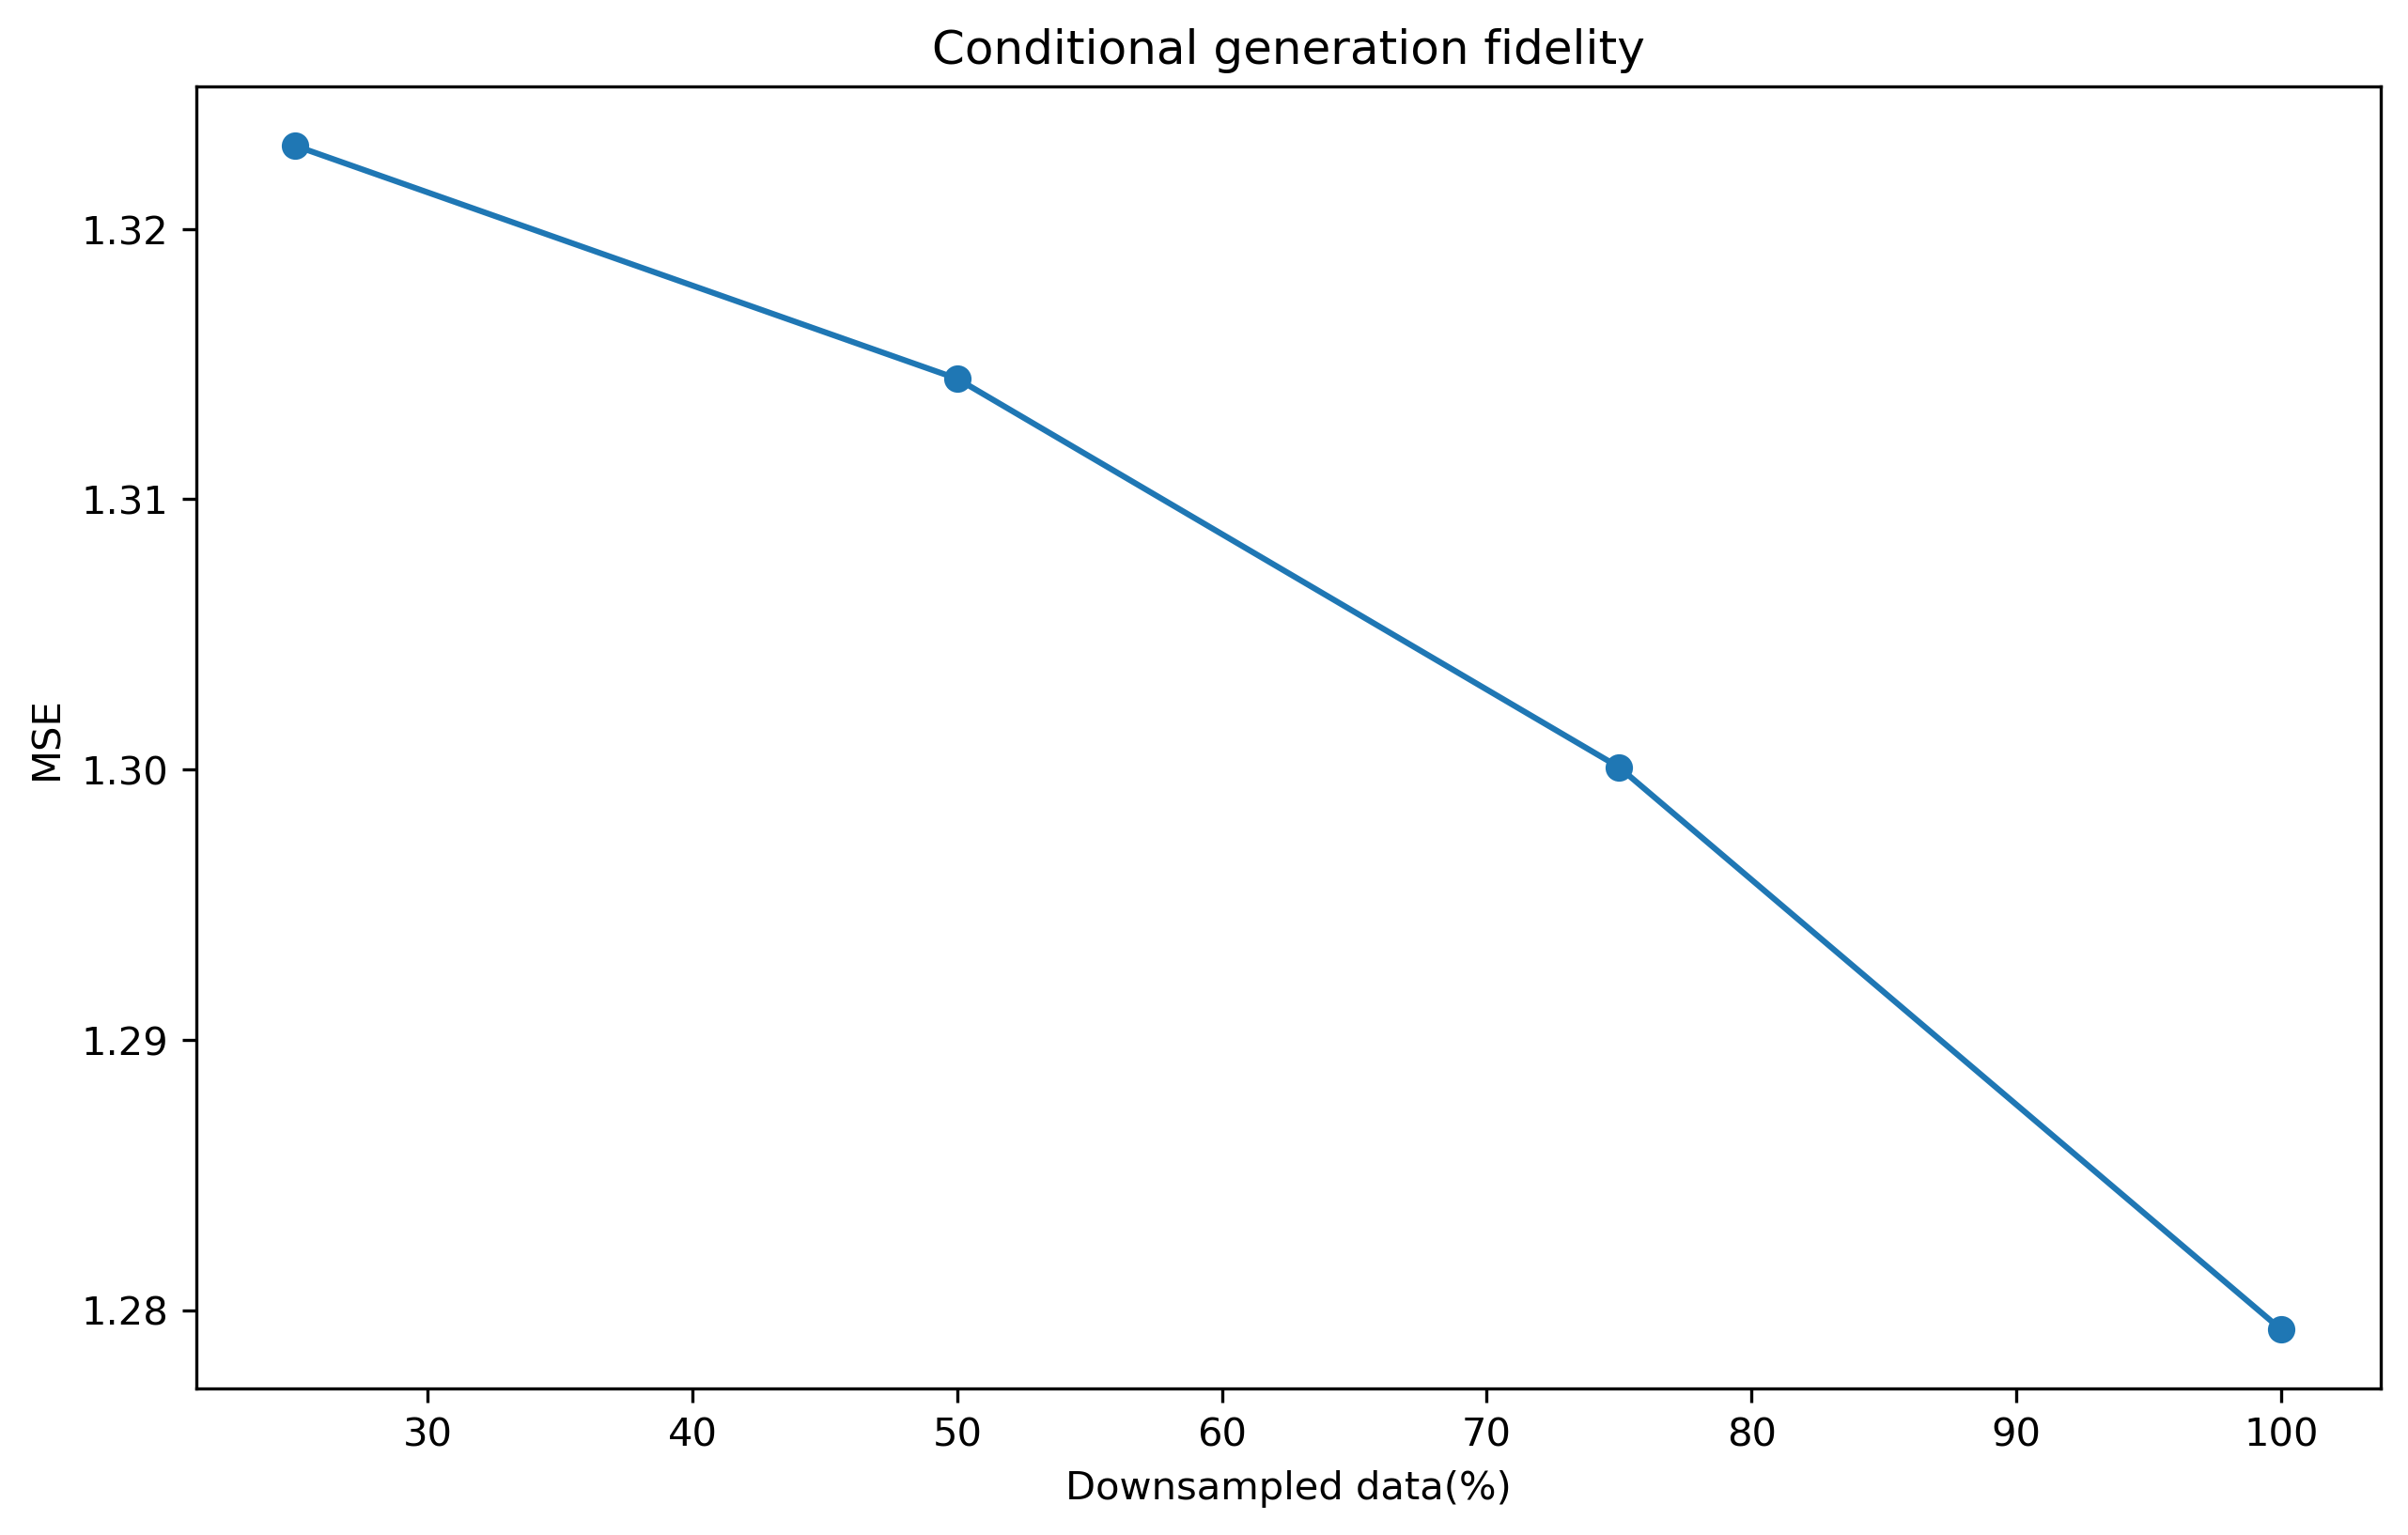

In [1]:
# conditional generation fidelity
# first ablation loss resuts WITH the sc loss - only with one seed, 42
import numpy as np

fractions = np.array([1.0, 0.75, 0.5, 0.25])*100
mse = [1.279284119606018, 1.3000849485397339, 1.3144601583480835, 1.3230793476104736]

#plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6), dpi=300)
plt.plot(fractions, mse, marker='o')
plt.xlabel('Downsampled data(%)')
plt.ylabel('MSE')
plt.title('Conditional generation fidelity')
plt.show()

In [ ]:
# conditional generation fidelity
# second ablation loss resuts WITHOUT the sc loss - two samples for each fraction, all different seeds 

